In [10]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = gpd.read_file("data/business_improvement_districts/geo_export_dbb02709-f1f5-4873-8e5c-26ed74990dbd.shp")


In [11]:
data['date_creat'] = pd.to_datetime(data['date_creat'])
data['area'] = 3.58701e-8*data['geometry'].to_crs({'init':'epsg:2263'}).area
data['year_created'] = data['date_creat'].dt.year

In [12]:
new_bids = data.groupby(['year_created', 'borough'])['area'].sum().unstack().fillna(0)
new_bids.reset_index(inplace = True)
new_bids = new_bids.melt(id_vars = 'year_created', value_name = 'total_area')
new_bids

,year_created,borough,total_area
0,2008,Bronx,0.434878
1,2016,Bronx,0.298584
2,2017,Bronx,0.000000
3,2008,Brooklyn,1.079433
4,2016,Brooklyn,0.696910
5,2017,Brooklyn,0.000000
6,2008,Manhattan,2.370947
7,2016,Manhattan,0.847618
8,2017,Manhattan,0.000000
9,2008,Queens,0.732459


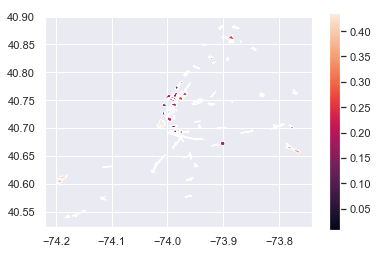

In [15]:
sns.set(style = 'darkgrid')

data.plot(column = 'area', legend = True)
plt.show()